# Titanic Project

# Algorithm Evaluation
### Which to algo to select for given dataset

In [65]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train dataset

In [66]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


### Step 2: Perform basic data quality checks

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [68]:
m = df.isna().sum()
m[m>0]

Series([], dtype: int64)

In [69]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(Survived)

In [70]:
X = df.drop(columns=['id','Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [71]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [72]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Step 4: Create a preprocessing pipeline for X

In [73]:
# Seperate cat and con features first
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [74]:
cat

['Type']

In [75]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [77]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [78]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [79]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [80]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Step 4: Apply train test split

In [81]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [82]:
xtrain.shape

(109143, 13)

In [83]:
xtest.shape

(27286, 13)

### Step 5: Algo Evaluation

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [85]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       }

In [86]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier())])

In [87]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
train_scores = []
test_scores = []
train_cv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Evaluate f1 scores for train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Cross validate results for train data
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above values in list
    train_scores.append(f1_train)
    test_scores.append(f1_test)
    train_cv.append(f1_cv)
    # Print the results
    print(f'Model Name : {name}\n')
    print(f'Train F1 : {f1_train:.4f}')
    print(f'Test F1 : {f1_test:.4f}')
    print(f'Train CV 5 fold : {f1_cv:.4f}')
    print('\n================================================\n')

Model Name : Logistic

Train F1 : 0.9303
Test F1 : 0.9315
Train CV 5 fold : 0.9303


Model Name : Decision Tree

Train F1 : 0.9975
Test F1 : 0.8809
Train CV 5 fold : 0.8711


Model Name : Random Forest

Train F1 : 0.9975
Test F1 : 0.9311
Train CV 5 fold : 0.9277




### Create a dataframe to show above results

In [88]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest'])

In [89]:
res = {'name':list(dct.keys()),
       'Train':train_scores,
       'Test':test_scores,
       'CV':train_cv}

In [90]:
df_res = pd.DataFrame(res)
df_res

,name,Train,Test,CV
0,Logistic,0.930296,0.931457,0.930293
1,Decision Tree,0.997464,0.880946,0.871052
2,Random Forest,0.997473,0.931066,0.927739


In [91]:
df_res.sort_values(by='CV', ascending=False)

,name,Train,Test,CV
0,Logistic,0.930296,0.931457,0.930293
2,Random Forest,0.997473,0.931066,0.927739
1,Decision Tree,0.997464,0.880946,0.871052


### Build the Best model  as Logistic it has higest CV score of 0.930293

In [92]:
from sklearn.linear_model import LogisticRegression

best_model = LogisticRegression()

# Train the model
best_model.fit(xtrain, ytrain)


LogisticRegression()

In [93]:
# Get class probabilities for the test data
class_probabilities = best_model.predict_proba(xtest)


### Evaluate best model in detail

In [94]:
best_model.score(xtrain, ytrain)

0.9961884866642845

In [95]:
best_model.score(xtest, ytest)

0.9961518727552591

In [96]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [97]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [98]:

ypred_test[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [99]:

ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


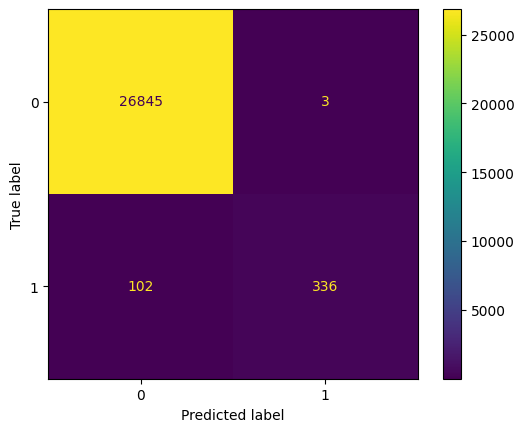

In [100]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### Step 8: Out of sample prediction with logistic regression

In [102]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [103]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [104]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


### Predict the results along with probability

In [105]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [106]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:

best_model.classes_

array([0, 1], dtype=int64)

In [108]:
probs[0:5]

array([[0.99789846, 0.00210154],
       [0.99896056, 0.00103944],
       [0.99743669, 0.00256331],
       [0.99722745, 0.00277255],
       [0.99657384, 0.00342616]])

In [109]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.00210154, 0.00103944, 0.00256331, 0.00277255, 0.00342616])

In [112]:
df_final = xnew[['Product ID']]
df_final

,Product ID
0,L50896
1,L53866
2,L50498
3,M21232
4,M19751
...,...
90949,L51130
90950,L47783
90951,L48097
90952,L48969


In [113]:
df_final['Survived_pred'] = preds
df_final['Prob_surv'] = prob_sur

In [114]:
df_final

,Product ID,Survived_pred,Prob_surv
0,L50896,0,0.002102
1,L53866,0,0.001039
2,L50498,0,0.002563
3,M21232,0,0.002773
4,M19751,0,0.003426
...,...,...,...
90949,L51130,0,0.002211
90950,L47783,0,0.000497
90951,L48097,0,0.002975
90952,L48969,0,0.002303


In [116]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

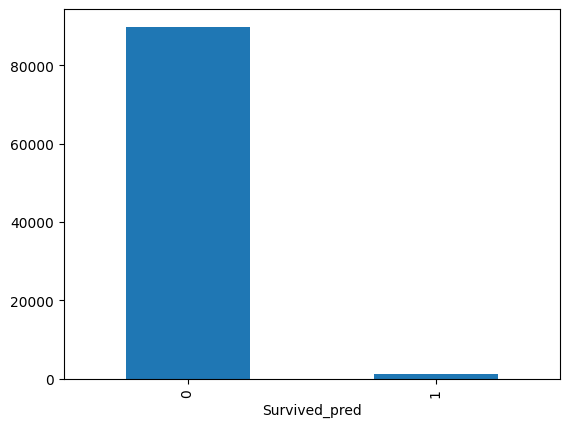

In [115]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

### Save results to csv

In [117]:
df_final.to_csv("Results.csv", index=False)